# Wind Energy Analysis in Ireland

Author: Philip Cullen

This notebook analyses historical wind speed data from Met Éireann
to explore wind energy potential and long-term trends across Ireland.

In [1]:
import os
os.listdir("data")

['mullingar.csv', 'valentia_obsrv.csv', 'malin_head.csv', 'dublin_airport.csv']

In [2]:
import pandas as pd

df = pd.read_csv(
    "data/malin_head.csv",
    sep=";",
    skiprows=22
)
df.head()

,"date,ind,rain,ind,temp,ind,wetb,dewpt,vappr,rhum,msl,ind,wdsp,ind,wddir,ww,w,sun,vis,clht,clamt"
0,"01-may-1955 01:00,0,0.0,0,8.5,0,7.2,5.5,9.1,83..."
1,"01-may-1955 02:00,0,0.0,0,8.2,0,7.2,6.1,9.3,85..."
2,"01-may-1955 03:00,3,0.0,0,7.3,0,6.6,5.5,9.3,91..."
3,"01-may-1955 04:00,3,0.0,0,7.8,0,7.2,6.1,9.6,91..."
4,"01-may-1955 05:00,0,0.0,0,8.1,0,7.3,6.6,9.7,89..."


In [3]:
df.columns

Index(['date,ind,rain,ind,temp,ind,wetb,dewpt,vappr,rhum,msl,ind,wdsp,ind,wddir,ww,w,sun,vis,clht,clamt'], dtype='object')

## 2. Data Loading and Initial Inspection

This section involves the loading and initial inspection of the Met Éireann weather data.

This includes:

- Identifying the header structure used in the raw CSV files

- Verifying that the data loads correctly into pandas DataFrames

- Confirming column names and data types

- Checking dataset size

- Inspecting for missing or malformed values

- Verifying station identifiers after merging multiple datasets

This step ensures the data is correctly structured and suitable for further cleaning, analysis, and visualisation in later stages of the project.

In [4]:
import pandas as pd
import numpy as np

In [5]:
def load_station(path, station_name, skiprows=0):
    df = pd.read_csv(path, sep=";", skiprows=skiprows)
    df["station"] = station_name
    return df

In [6]:
malin = load_station(
    "data/malin_head.csv",
    station_name="Malin Head",
    skiprows=23
)

malin.head()

,"date,ind,rain,ind,temp,ind,wetb,dewpt,vappr,rhum,msl,ind,wdsp,ind,wddir,ww,w,sun,vis,clht,clamt",station
0,"01-may-1955 01:00,0,0.0,0,8.5,0,7.2,5.5,9.1,83...",Malin Head
1,"01-may-1955 02:00,0,0.0,0,8.2,0,7.2,6.1,9.3,85...",Malin Head
2,"01-may-1955 03:00,3,0.0,0,7.3,0,6.6,5.5,9.3,91...",Malin Head
3,"01-may-1955 04:00,3,0.0,0,7.8,0,7.2,6.1,9.6,91...",Malin Head
4,"01-may-1955 05:00,0,0.0,0,8.1,0,7.3,6.6,9.7,89...",Malin Head


In [7]:
valentia = load_station("data/valentia_obsrv.csv", "Valentia", skiprows=23)
dublin = load_station("data/dublin_airport.csv", "Dublin Airport", skiprows=23)
mullingar = load_station("data/mullingar.csv", "Mullingar", skiprows=17)

In [8]:
malin.columns


Index(['date,ind,rain,ind,temp,ind,wetb,dewpt,vappr,rhum,msl,ind,wdsp,ind,wddir,ww,w,sun,vis,clht,clamt', 'station'], dtype='object')

In [9]:
valentia.columns

Index(['date,ind,rain,ind,temp,ind,wetb,dewpt,vappr,rhum,msl,ind,wdsp,ind,wddir,ww,w,sun,vis,clht,clamt', 'station'], dtype='object')

In [10]:
dublin.columns

Index(['date,ind,rain,ind,temp,ind,wetb,dewpt,vappr,rhum,msl,ind,wdsp,ind,wddir,ww,w,sun,vis,clht,clamt', 'station'], dtype='object')

In [11]:
mullingar.columns

Index(['date,ind,rain,ind,temp,ind,wetb,dewpt,vappr,rhum,msl,ind,wdsp,ind,wddir', 'station'], dtype='object')

### Data Overview

- Daily historical weather data from Met Éireann
- Four stations: two coastal, two inland
- Data includes wind speed and additional meteorological variables
- Files contain metadata rows and use semicolon delimiters, requiring preprocessing

Initial inspection revealed that the Met Éireann CSV files include
metadata rows and non-standard headers, requiring additional preprocessing
before analysis.

## 3. Data Cleaning and Standardisation

This section resolves the formatting issues identified during initial
inspection, including correcting headers, standardising column names,
and preparing the data for analysis.

Some columns contain mixed data types due to missing values and coded entries in the raw Met Éireann files. These are handled explicitly during data cleaning and type conversion.

In [12]:
import warnings

In [13]:
warnings.filterwarnings("ignore")

In [14]:
def load_and_clean_station(path, station_name, header_row):
    df = pd.read_csv(path, header=header_row)

    # Add station label
    df["station"] = station_name

    # Keep only required columns
    df = df[["date", "wdsp", "wddir", "station"]]

    # Convert datatypes
    df["date"] = pd.to_datetime(df["date"], errors="coerce")
    df["wdsp"] = pd.to_numeric(df["wdsp"], errors="coerce")
    df["wddir"] = pd.to_numeric(df["wddir"], errors="coerce")

    # Drop rows with missing core values
    df = df.dropna(subset=["date", "wdsp", "wddir"])

    return df

In [15]:
malin = load_and_clean_station("data/malin_head.csv", "Malin Head", 20)
valentia = load_and_clean_station("data/valentia_obsrv.csv", "Valentia", 20)
dublin = load_and_clean_station("data/dublin_airport.csv", "Dublin Airport", 20)
mullingar = load_and_clean_station("data/mullingar.csv", "Mullingar", 14)

df = pd.concat([malin, valentia, dublin, mullingar], ignore_index=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2493329 entries, 0 to 2493328
Data columns (total 4 columns):
 #   Column   Dtype         
---  ------   -----         
 0   date     datetime64[ns]
 1   wdsp     float64       
 2   wddir    float64       
 3   station  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 76.1+ MB


In [17]:
df.head()
df["station"].value_counts()

station
Dublin Airport    709296
Valentia          709183
Malin Head        618660
Mullingar         456190
Name: count, dtype: int64

## 4. Data Cleaning & Feature Preparation

This step focuses on preparing the dataset for wind speed analysis.

Relevant columns were selected, data types were converted where necessary, and invalid or missing values were removed.

Additional time-based features were created to support temporal analysis of wind patterns across stations.

In [18]:
cols = ["date", "wdsp", "wddir", "station"]
df_wind = df[cols].copy()

df_wind["date"] = pd.to_datetime(df_wind["date"], errors="coerce")

In [19]:
df_wind["wdsp"] = pd.to_numeric(df_wind["wdsp"], errors="coerce")
df_wind["wddir"] = pd.to_numeric(df_wind["wddir"], errors="coerce")

In [20]:
df_wind = df_wind.dropna(subset=["date", "wdsp"])

In [21]:
df_wind["year"] = df_wind["date"].dt.year
df_wind["month"] = df_wind["date"].dt.month

In [22]:
df_wind.info()
df_wind.describe()
df_wind["station"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2493329 entries, 0 to 2493328
Data columns (total 6 columns):
 #   Column   Dtype         
---  ------   -----         
 0   date     datetime64[ns]
 1   wdsp     float64       
 2   wddir    float64       
 3   station  object        
 4   year     int32         
 5   month    int32         
dtypes: datetime64[ns](1), float64(2), int32(2), object(1)
memory usage: 95.1+ MB


station
Dublin Airport    709296
Valentia          709183
Malin Head        618660
Mullingar         456190
Name: count, dtype: int64

## 5. Daily Measured Wind Speed Over Time

In [23]:
import matplotlib.pyplot as plt

In [24]:
station_colors = {
    "Malin Head": "tab:blue",
    "Valentia": "tab:green",
    "Dublin Airport": "tab:orange",
    "Mullingar": "tab:red"
}

In [25]:
daily_wind = (
    df_wind
    .set_index("date")
    .groupby("station")["wdsp"]
    .resample("D")
    .mean()
    .reset_index()
)

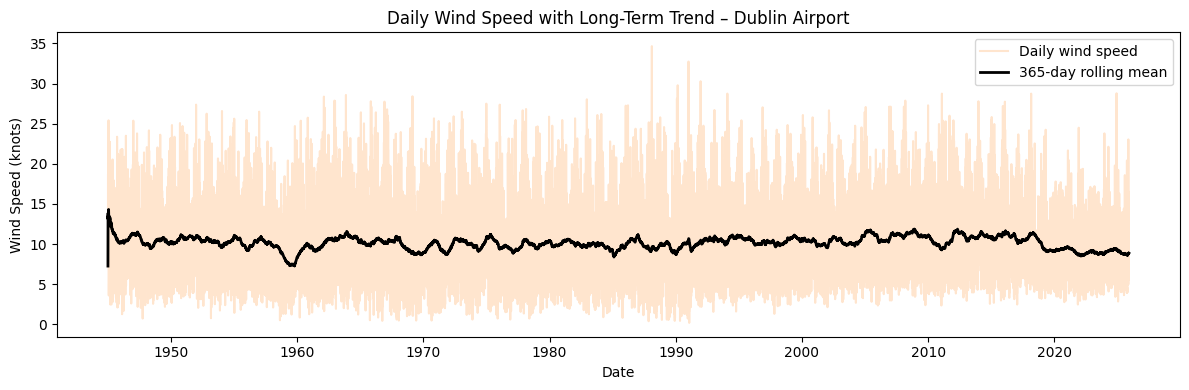

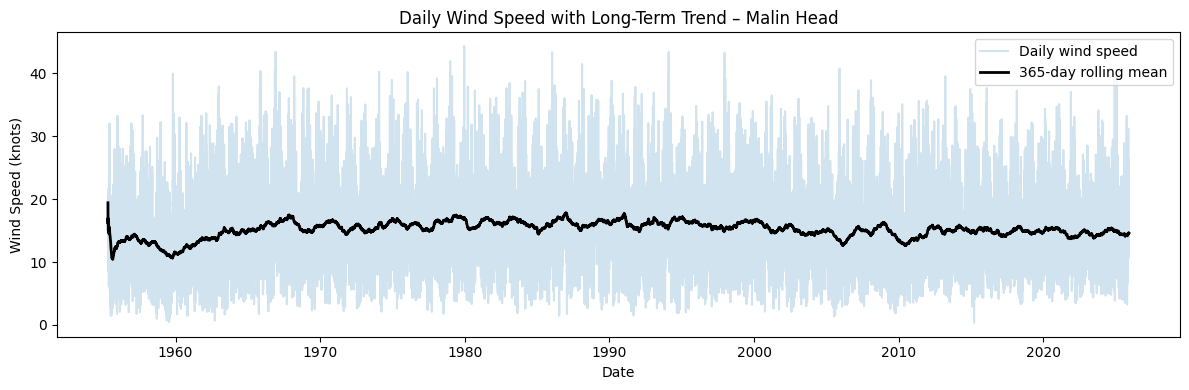

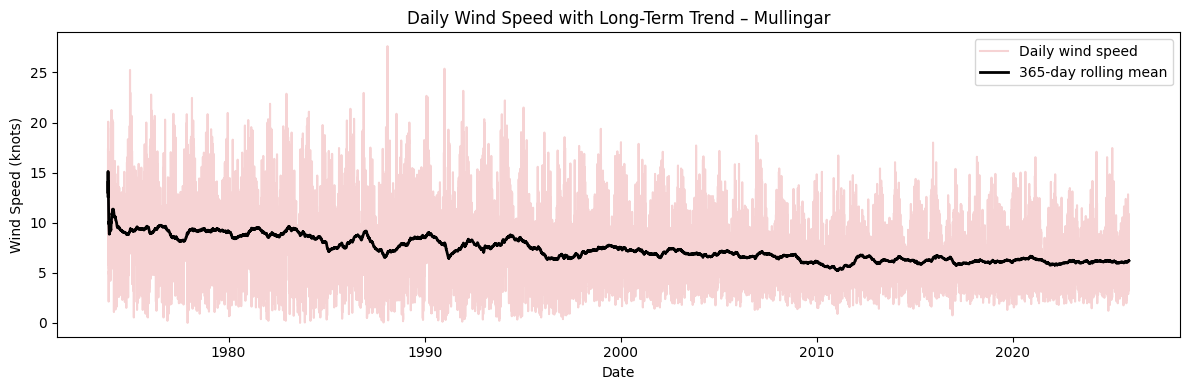

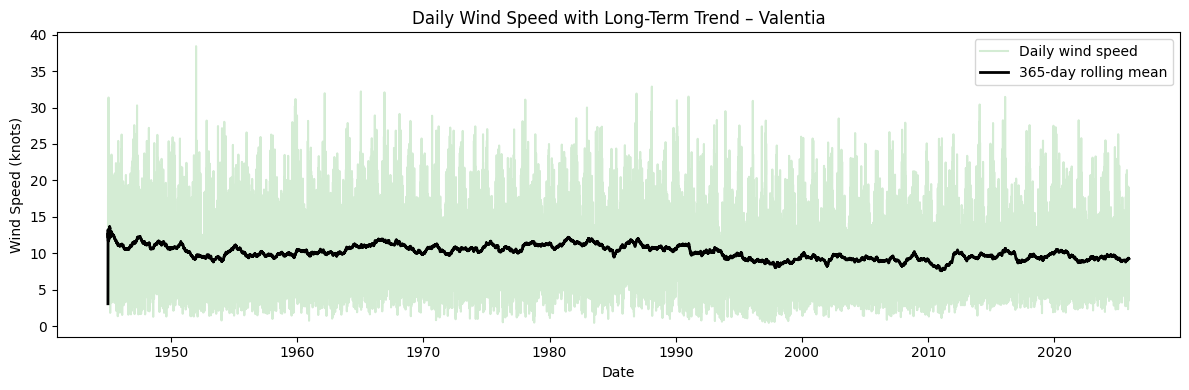

In [26]:
for station in daily_wind["station"].unique():
    data = daily_wind[daily_wind["station"] == station]

    rolling = (
        data
        .set_index("date")["wdsp"]
        .rolling("365D")
        .mean()
    )

    plt.figure(figsize=(12, 4))

    plt.plot(
        data["date"],
        data["wdsp"],
        color=station_colors[station],
        alpha=0.2,
        label="Daily wind speed"
    )

    plt.plot(
        rolling.index,
        rolling.values,
        color="black",
        linewidth=2,
        label="365-day rolling mean"
    )

    plt.xlabel("Date")
    plt.ylabel("Wind Speed (knots)")
    plt.title(f"Daily Wind Speed with Long-Term Trend – {station}")
    plt.legend()
    plt.tight_layout()

The data show that for all the recorded wind speed data that:

1. Mullingar encounters much lower wind speeds than the other stations.

2. Since approximately 1990 the wind speed in Mullinagr has decreased.

3. Valentia, Dublin Airport, and Malin Head have had historically similar daily wind speeds.

## 6. Exploratory Wind Speed Analysis

This step explores wind speed patterns across selected Irish weather stations.

Average wind speeds are compared between locations, and seasonal trends are examined using monthly aggregates.

The analysis highlights clear differences between coastal and inland stations and demonstrates the suitability of certain regions for wind energy generation.

In [27]:
mean_wind = (
    df_wind
    .groupby("station")["wdsp"]
    .mean()
    .sort_values(ascending=False)
)

mean_wind

station
Malin Head        15.209558
Dublin Airport    10.114264
Valentia          10.103674
Mullingar          7.289783
Name: wdsp, dtype: float64

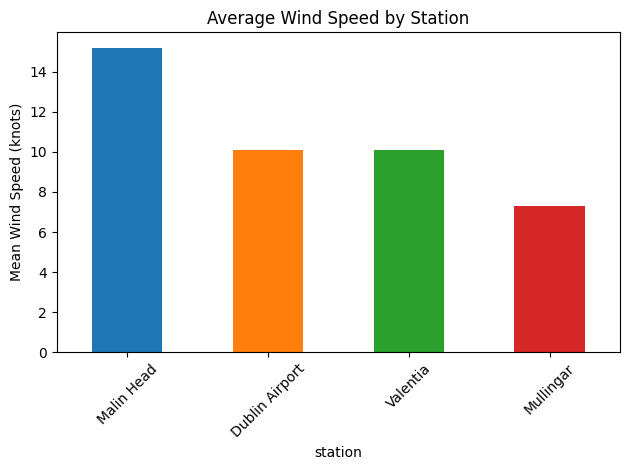

In [28]:
mean_wind.plot(
    kind="bar",
    color=[station_colors[station] for station in mean_wind.index]
)

plt.ylabel("Mean Wind Speed (knots)")
plt.title("Average Wind Speed by Station")
plt.xticks(rotation=45)
plt.tight_layout()

The coastal stations (Malin Head and Valentia) exhibit higher average wind speeds than inland locations such as Mullingar. 

Interesitngly, Dublin airpot has a similar average windspeed to Valentia.

This aligns with expectations and suggests that coastal regions are generally more suitable for wind energy generation.

In [29]:
monthly_wind = (
    df_wind
    .groupby(["station", "month"])["wdsp"]
    .mean()
    .reset_index()
)

monthly_wind.head()

,station,month,wdsp
0,Dublin Airport,1,11.918492
1,Dublin Airport,2,11.718295
2,Dublin Airport,3,11.196369
3,Dublin Airport,4,9.988254
4,Dublin Airport,5,9.223583


Wind speeds are generally higher during winter months and lower during summer across all stations. 

This seasonal pattern is important for understanding expected variability in wind power generation throughout the year.

#### Dublin Airport vs Valentia Observatory

Although Valentia is more exposed to Atlantic weather systems, long-term average wind speeds at Dublin Airport are comparable, likely due to consistent maritime influence and prevailing wind patterns. 

This highlights the importance of considering not only mean wind speed but also variability and extremes when assessing wind energy potential.

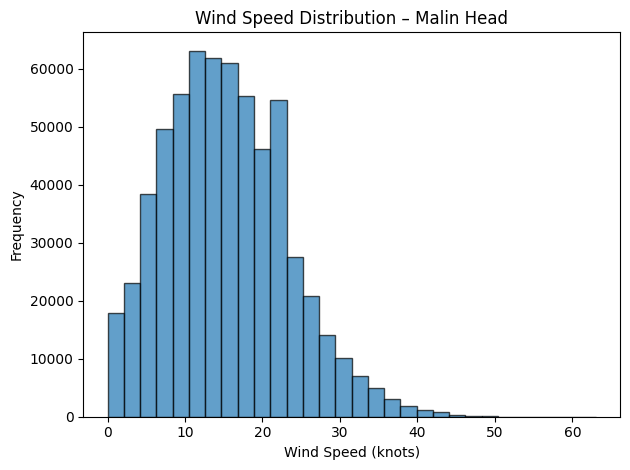

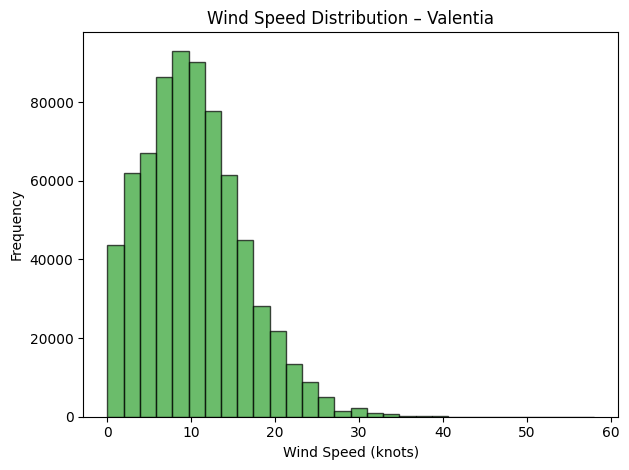

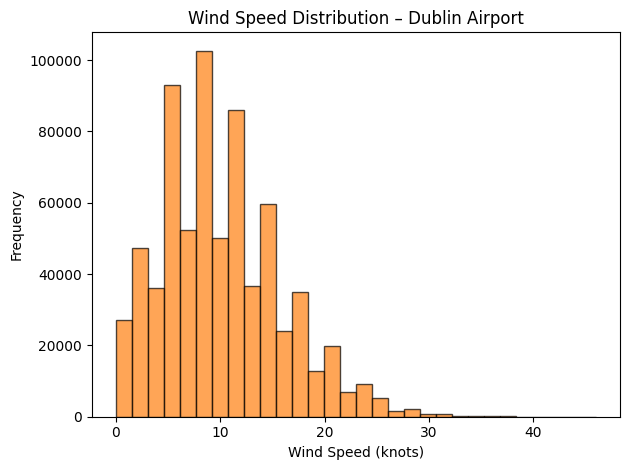

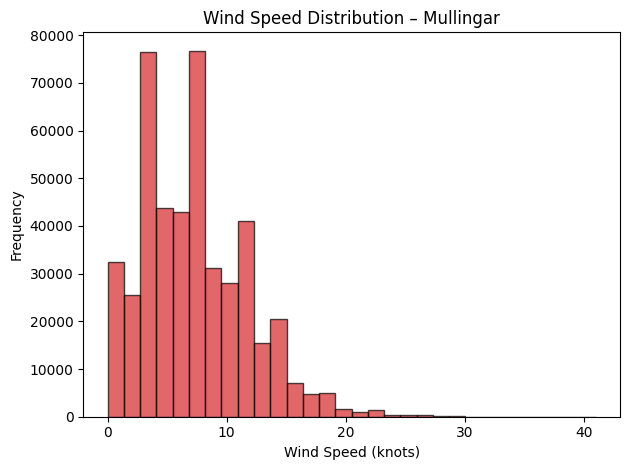

In [30]:
for station in df_wind["station"].unique():
    data = df_wind[df_wind["station"] == station]["wdsp"]

    plt.figure()
    plt.hist(
        data,
        bins=30,
        color=station_colors[station],
        edgecolor="black",
        alpha=0.7
    )

    plt.title(f"Wind Speed Distribution – {station}")
    plt.xlabel("Wind Speed (knots)")
    plt.ylabel("Frequency")
    plt.tight_layout()

In [31]:
cut_in = 6
cut_out = 48

operating_pct = (
    df_wind
    .assign(in_range=lambda x: (x["wdsp"] >= cut_in) & (x["wdsp"] <= cut_out))
    .groupby("station")["in_range"]
    .mean() * 100
)

operating_pct.sort_values(ascending=False)

station
Malin Head        90.579802
Dublin Airport    78.278462
Valentia          75.666647
Mullingar         60.941055
Name: in_range, dtype: float64

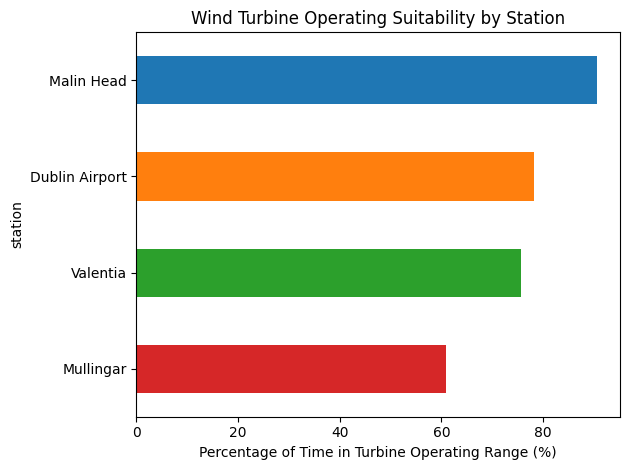

In [32]:
operating_pct.sort_values().plot(
    kind="barh",
    color=[station_colors[station] for station in operating_pct.sort_values().index]
)

plt.xlabel("Percentage of Time in Turbine Operating Range (%)")
plt.title("Wind Turbine Operating Suitability by Station")
plt.tight_layout()

## 7. Estimated Wind Energy Potential by Station

This section estimates and compares the relative wind energy potential of each station using historical wind speed data.

In order to do this some assumptions are made:

1. Identical turbine characteristics at each location

2. Differences in output are driven only by wind speed

This keeps the analysis fair and easy to justify.

The theoretical power available in wind is proportional to:

𝑃 ∝ 𝑣^3

where 𝑣 = wind speed

In [33]:
df_wind["relative_power"] = df_wind["wdsp"] ** 3

In [34]:
energy_by_station = (
    df_wind
    .groupby("station")["relative_power"]
    .mean()
    .sort_values(ascending=False)
)

energy_by_station

station
Malin Head        6570.074479
Valentia          2305.474085
Dublin Airport    2140.398050
Mullingar          885.925500
Name: relative_power, dtype: float64

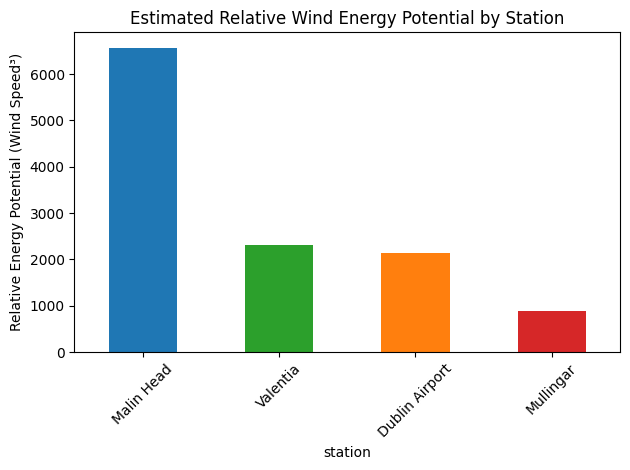

In [35]:
energy_by_station.plot(
    kind="bar",
    color=[station_colors[s] for s in energy_by_station.index]
)

plt.ylabel("Relative Energy Potential (Wind Speed³)")
plt.title("Estimated Relative Wind Energy Potential by Station")
plt.xticks(rotation=45)
plt.tight_layout()

In [36]:
energy_normalised = energy_by_station / energy_by_station.max() * 100
energy_normalised

station
Malin Head        100.000000
Valentia           35.090532
Dublin Airport     32.577988
Mullingar          13.484254
Name: relative_power, dtype: float64

## 9. Estimated Historical Wind Energy Generation

This section uses the historical data generated in section 5 to calulate the historical energy generation by the stations.

A simplified wind power relationship proportional to the cube of wind speed is used to estimate relative energy generation. 

Identical turbine characteristics are assumed at all locations, and results represent comparative historical energy potential rather than absolute power output.

In [37]:
daily_wind["daily_energy_proxy"] = daily_wind["wdsp"] ** 3

In [38]:
historical_energy = (
    daily_wind
    .groupby("station")["daily_energy_proxy"]
    .sum()
    .sort_values(ascending=False)
)

historical_energy

station
Malin Head        1.439844e+08
Valentia          5.455715e+07
Dublin Airport    5.082098e+07
Mullingar         1.337738e+07
Name: daily_energy_proxy, dtype: float64

In [39]:
historical_energy_pct = (
    historical_energy / historical_energy.max() * 100
)

historical_energy_pct

station
Malin Head        100.000000
Valentia           37.891004
Dublin Airport     35.296157
Mullingar           9.290850
Name: daily_energy_proxy, dtype: float64

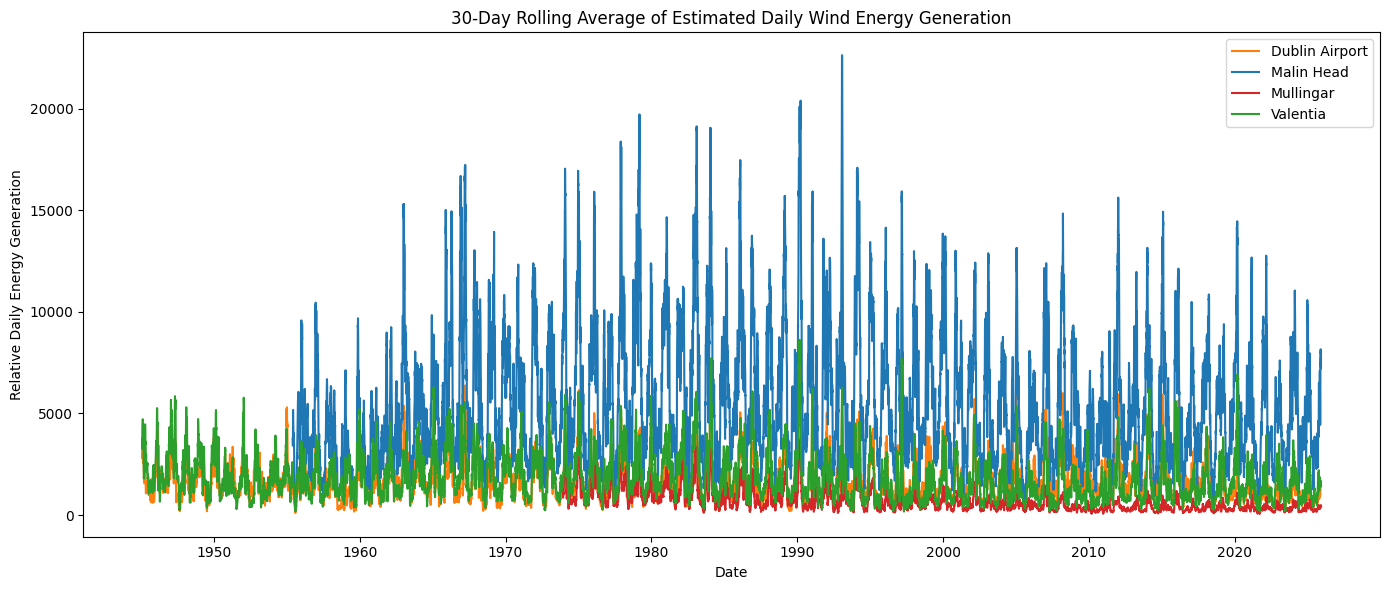

In [40]:
plt.figure(figsize=(14, 6))

for station, group in daily_wind.groupby("station"):
    rolling_energy = (
        group
        .sort_values("date")
        .set_index("date")["daily_energy_proxy"]
        .rolling(30)
        .mean()
    )

    plt.plot(
        rolling_energy.index,
        rolling_energy.values,
        label=station,
        color=station_colors[station]
    )

plt.title("30-Day Rolling Average of Estimated Daily Wind Energy Generation")
plt.xlabel("Date")
plt.ylabel("Relative Daily Energy Generation")
plt.legend()
plt.tight_layout()


While there is significant overlap between the stations, it can be clearly observed that Malin Head has the most energy generation.

This correates with previous data that showed Malin Head tended to have the highest wind speeds. 

Therefore, it is reasonable to assume:

1. There is a direct correlation between wind speed and energy generation.

2. Coastal wind farms generate more energy that inland farms.

3. Northern coastal wind farms tend to generate more energy than southern coastal wind farms.

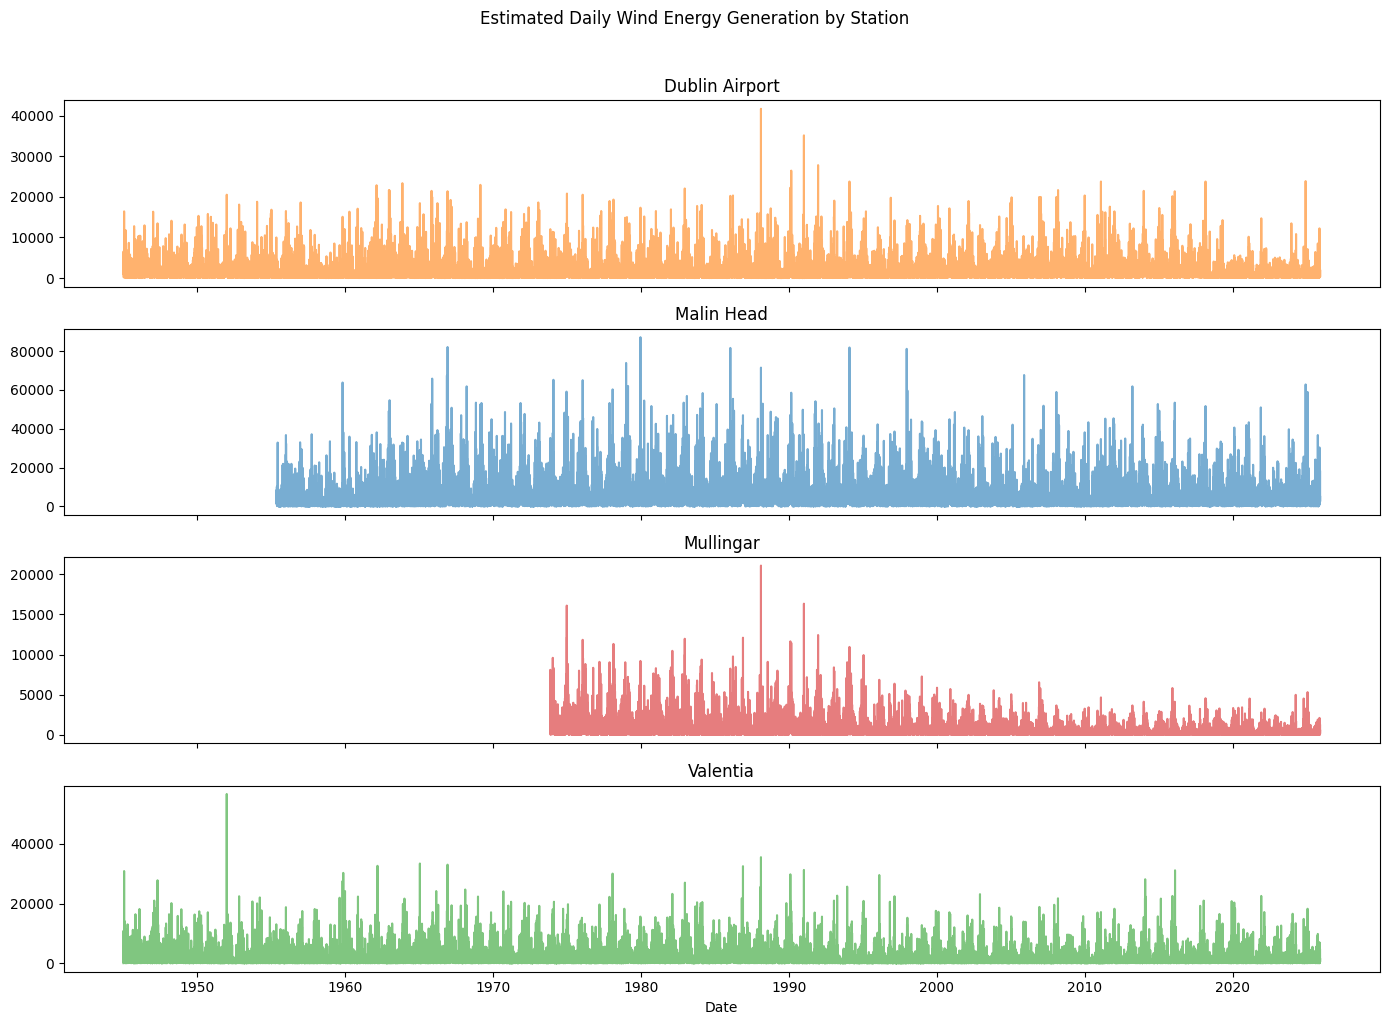

In [41]:
stations = daily_wind["station"].unique()

fig, axes = plt.subplots(len(stations), 1, figsize=(14, 10), sharex=True)

for ax, station in zip(axes, stations):
    station_data = daily_wind[daily_wind["station"] == station]

    ax.plot(
        station_data["date"],
        station_data["daily_energy_proxy"],
        color=station_colors[station],
        alpha=0.6
    )

    ax.set_title(station)

axes[-1].set_xlabel("Date")
fig.suptitle("Estimated Daily Wind Energy Generation by Station", y=1.02)
plt.tight_layout()

While daily wind speed varies smoothly over time, the cubic relationship between wind speed and energy generation amplifies high-wind events, resulting in greater variability in estimated daily energy output.